#### EDA

In [55]:
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


In [2]:
df = pd.read_csv("final_dataframe.csv")

In [3]:
df.head()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION
0,Apartamento 03 quartos,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30662050,Tirol (Barreiro),R$ 350,R$ 120,67m²,3,2,1,"Área de serviço, Armários na cozinha, Armários...",260000.0,barreiro
1,Apto,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620250,Milionários (Barreiro),R$ 250,R$ 0,66m²,3,1,1,"Área de serviço, Armários na cozinha, Armários...",239990.0,barreiro
2,"Apartamento à venda - Barreiro, 2 quartos - Be...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30640150,Barreiro,R$ 300,R$ 2.402,56m²,2,1,1,Área de serviço,310000.0,barreiro
3,"Apartamento à Venda - Palmares, 3 Quartos, 85 m2",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31155292,Santa Cruz,R$ 900,R$ 270,85m²,3,2,2,"Churrasqueira, Piscina",620000.0,barreiro
4,"Apartamento 02 quartos, 01 vaga à venda no Bai...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620070,Milionários (Barreiro),R$ 290,R$ 400,47m²,2,1,1,"Área de serviço, Mobiliado",209900.0,barreiro


In [4]:
df.tail()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION
24392,Apartamento 03 quartos com 2 suítes no Buritis,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30575834,Buritis,R$ 660,R$ 0,104m²,3,3,3,NaN,846000.0,zona_oeste
24393,"Apartamento com 3 quartos à venda, 100 m² por ...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30493165,Buritis,R$ 0,R$ 0,100m²,3,3,4,"Churrasqueira, Piscina",920000.0,zona_oeste
24394,A Cobertura Que Você Procura pelo Preço Que Vo...,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30575060,Buritis,R$ 540,R$ 0,190m²,3,3,2,Área de serviço,790000.0,zona_oeste
24395,Apartamento para venda com 2 quartos em Burit...,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30575740,Buritis,R$ 600,R$ 200,66m²,2,3,2,"Academia, Ar condicionado, Churrasqueira, Piscina",598000.0,zona_oeste
24396,Apartamento 3 quartos,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30421125,Nova Suíssa,R$ 230,89m²,2,3,1,"Ar condicionado, Área de serviço, Armários na ...","Ar condicionado, Área de serviço, Armários na ...",385000.0,zona_oeste


#### Verificando as variáveis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24397 entries, 0 to 24396
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TITLE              24397 non-null  object 
 1   LINK               24397 non-null  object 
 2   DATE_SCRAPE        24397 non-null  object 
 3   CITY               24397 non-null  object 
 4   CEP                24397 non-null  int64  
 5   NEIGHBORHOOD       24397 non-null  object 
 6   CONDO              24397 non-null  object 
 7   TAX                24395 non-null  object 
 8   AREA               24388 non-null  object 
 9   ROOMS_NO           24397 non-null  object 
 10  BATH_NO            24342 non-null  object 
 11  PARKING_SPOTS      24286 non-null  object 
 12  APARTMENT_DETAILS  14367 non-null  object 
 13  PRICE              24384 non-null  float64
 14  REGION             24397 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.8+ MB


 As features condo, tax, area, bath_no, parking spots, a e rooms_no estão como objeto. Vamos altera-las para dados numéricos.

In [6]:
# Removendo o "R$ " da coluna 'condo'
df['CONDO'] = df['CONDO'].str.replace('R$ ', '', regex=False)

# Convertendo a coluna para numérico
df['CONDO'] = pd.to_numeric(df['CONDO'], errors='coerce')

# Removendo o "R$ " da coluna 'tax'
df['TAX'] = df['TAX'].str.replace('R$ ', '', regex=False)

# Convertendo a coluna para numérico
df['TAX'] = pd.to_numeric(df['TAX'], errors='coerce')

In [7]:
# Certifique-se de que não há NaNs nessas colunas. Se houver, você pode preenchê-los ou removê-los, dependendo de sua necessidade.
# Por exemplo, preenchendo NaNs com 0:
df['TAX'] = df['TAX'].fillna(0)
df['CONDO'] = df['CONDO'].fillna(0)

# Convertendo as colunas para inteiros
df['TAX'] = df['TAX'].astype(int)
df['CONDO'] = df['CONDO'].astype(int)

CONDO e TAX: OK

In [8]:
df.head()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION
0,Apartamento 03 quartos,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30662050,Tirol (Barreiro),350,120,67m²,3,2,1,"Área de serviço, Armários na cozinha, Armários...",260000.0,barreiro
1,Apto,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620250,Milionários (Barreiro),250,0,66m²,3,1,1,"Área de serviço, Armários na cozinha, Armários...",239990.0,barreiro
2,"Apartamento à venda - Barreiro, 2 quartos - Be...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30640150,Barreiro,300,2,56m²,2,1,1,Área de serviço,310000.0,barreiro
3,"Apartamento à Venda - Palmares, 3 Quartos, 85 m2",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31155292,Santa Cruz,900,270,85m²,3,2,2,"Churrasqueira, Piscina",620000.0,barreiro
4,"Apartamento 02 quartos, 01 vaga à venda no Bai...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620070,Milionários (Barreiro),290,400,47m²,2,1,1,"Área de serviço, Mobiliado",209900.0,barreiro


In [9]:
# Removendo o "m²" da coluna 'AREA'
df['AREA'] = df['AREA'].str.replace('m²', '', regex=False)



In [10]:
# Filtrando entradas não numéricas na coluna 'AREA'
non_numeric_entries = df['AREA'][df['AREA'].astype(str).str.isnumeric() == False]

# Calculando e imprimindo a contagem dessas entradas não numéricas
value_counts_non_numeric = non_numeric_entries.value_counts()
print(value_counts_non_numeric)


AREA
Padrão                                                                                 21
5 ou mais                                                                              12
Condomínio fechado, Permitido animais, Portaria, Salão de festas, Segurança 24h         2
Permitido animais, Portaria, Segurança 24h                                              2
Área de serviço                                                                         2
Academia, Condomínio fechado, Permitido animais, Piscina, Portaria, Salão de festas     2
Área de serviço, Armários na cozinha, Armários no quarto, Piscina                       2
Armários na cozinha, Armários no quarto                                                 1
Cobertura                                                                               1
Permitido animais                                                                       1
Área de serviço, Armários na cozinha, Armários no quarto                                1
Acade

In [11]:
# Criando uma máscara para entradas não numéricas na coluna 'AREA'
mask_non_numeric = df['AREA'].astype(str).str.isnumeric() == False

# Removendo essas entradas
df = df[~mask_non_numeric]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24339 entries, 0 to 24396
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TITLE              24339 non-null  object 
 1   LINK               24339 non-null  object 
 2   DATE_SCRAPE        24339 non-null  object 
 3   CITY               24339 non-null  object 
 4   CEP                24339 non-null  int64  
 5   NEIGHBORHOOD       24339 non-null  object 
 6   CONDO              24339 non-null  int32  
 7   TAX                24339 non-null  int32  
 8   AREA               24339 non-null  object 
 9   ROOMS_NO           24339 non-null  object 
 10  BATH_NO            24317 non-null  object 
 11  PARKING_SPOTS      24268 non-null  object 
 12  APARTMENT_DETAILS  14349 non-null  object 
 13  PRICE              24330 non-null  float64
 14  REGION             24339 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(11)
memory usage: 2.8+ MB


In [13]:
df['AREA'] = df['AREA'].astype(int)


AREA: OK, vamos para bath_no, parking spots, a e rooms_no

In [14]:
# Filtrando entradas não numéricas na coluna 'AREA'
non_numeric_entries = df['BATH_NO'][df['BATH_NO'].astype(str).str.isnumeric() == False]

# Calculando e imprimindo a contagem dessas entradas não numéricas
value_counts_non_numeric = non_numeric_entries.value_counts()
print(value_counts_non_numeric)

BATH_NO
5 ou mais                                                                                                       473
Padrão                                                                                                           33
Área de serviço                                                                                                  12
Área de serviço, Varanda                                                                                         10
Área de serviço, Armários na cozinha, Armários no quarto                                                          5
Armários na cozinha                                                                                               5
Armários na cozinha, Armários no quarto                                                                           4
Área de serviço, Churrasqueira                                                                                    4
Área de serviço, Armários na cozinha, Armários no quarto, Varand

O valor "5 ou mais" traz muita informação. Portanto, teremos que alterar para o valor "5"

In [15]:
df['BATH_NO'] = df['BATH_NO'].replace('5 ou mais', 5)


In [16]:
# Criando uma máscara para entradas não numéricas na coluna 'BATH_NO'
mask_non_numeric = df['BATH_NO'].astype(str).str.isnumeric() == False

# Removendo essas entradas
df = df[~mask_non_numeric]

In [17]:
df['BATH_NO'] = df['BATH_NO'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24201 entries, 0 to 24396
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TITLE              24201 non-null  object 
 1   LINK               24201 non-null  object 
 2   DATE_SCRAPE        24201 non-null  object 
 3   CITY               24201 non-null  object 
 4   CEP                24201 non-null  int64  
 5   NEIGHBORHOOD       24201 non-null  object 
 6   CONDO              24201 non-null  int32  
 7   TAX                24201 non-null  int32  
 8   AREA               24201 non-null  int32  
 9   ROOMS_NO           24201 non-null  object 
 10  BATH_NO            24201 non-null  int32  
 11  PARKING_SPOTS      24186 non-null  object 
 12  APARTMENT_DETAILS  14279 non-null  object 
 13  PRICE              24199 non-null  float64
 14  REGION             24201 non-null  object 
dtypes: float64(1), int32(4), int64(1), object(9)
memory usage: 2.6+ MB


BATH_NO: OK, vamos para parking spots, e rooms_no

In [19]:
# Filtrando entradas não numéricas na coluna 'AREA'
non_numeric_entries = df['PARKING_SPOTS'][df['PARKING_SPOTS'].astype(str).str.isnumeric() == False]

# Calculando e imprimindo a contagem dessas entradas não numéricas
value_counts_non_numeric = non_numeric_entries.value_counts()
print(value_counts_non_numeric)

PARKING_SPOTS
Padrão                                                                                                 209
5 ou mais                                                                                              135
Área de serviço                                                                                        102
Varanda                                                                                                 42
Área de serviço, Armários na cozinha, Armários no quarto                                                39
                                                                                                      ... 
Academia, Armários na cozinha, Armários no quarto, Churrasqueira, Piscina                                1
Permitido animais, Salão de festas                                                                       1
Armários no quarto                                                                                       1
Ar condicionado, Área d

In [20]:
df['PARKING_SPOTS'] = df['PARKING_SPOTS'].replace('5 ou mais', 5)

In [21]:
# Criando uma máscara para entradas não numéricas na coluna 'BATH_NO'
mask_non_numeric = df['PARKING_SPOTS'].astype(str).str.isnumeric() == False

# Removendo essas entradas
df = df[~mask_non_numeric]

In [22]:
df['PARKING_SPOTS'] = df['PARKING_SPOTS'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23373 entries, 0 to 24395
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TITLE              23373 non-null  object 
 1   LINK               23373 non-null  object 
 2   DATE_SCRAPE        23373 non-null  object 
 3   CITY               23373 non-null  object 
 4   CEP                23373 non-null  int64  
 5   NEIGHBORHOOD       23373 non-null  object 
 6   CONDO              23373 non-null  int32  
 7   TAX                23373 non-null  int32  
 8   AREA               23373 non-null  int32  
 9   ROOMS_NO           23373 non-null  object 
 10  BATH_NO            23373 non-null  int32  
 11  PARKING_SPOTS      23373 non-null  int32  
 12  APARTMENT_DETAILS  13808 non-null  object 
 13  PRICE              23372 non-null  float64
 14  REGION             23373 non-null  object 
dtypes: float64(1), int32(5), int64(1), object(8)
memory usage: 2.4+ MB


PARKING_SPOTS: OK, vamos para rooms_no

In [24]:
# Filtrando entradas não numéricas na coluna 'AREA'
non_numeric_entries = df['ROOMS_NO'][df['ROOMS_NO'].astype(str).str.isnumeric() == False]

# Calculando e imprimindo a contagem dessas entradas não numéricas
value_counts_non_numeric = non_numeric_entries.value_counts()
print(value_counts_non_numeric)

ROOMS_NO
5 ou mais    176
Name: count, dtype: int64


In [25]:
df['ROOMS_NO'] = df['ROOMS_NO'].replace('5 ou mais', 5)

In [26]:
df['ROOMS_NO'] = df['ROOMS_NO'].astype(int)

In [27]:
df['ROOMS_NO'] = df['ROOMS_NO'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23373 entries, 0 to 24395
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TITLE              23373 non-null  object 
 1   LINK               23373 non-null  object 
 2   DATE_SCRAPE        23373 non-null  object 
 3   CITY               23373 non-null  object 
 4   CEP                23373 non-null  int64  
 5   NEIGHBORHOOD       23373 non-null  object 
 6   CONDO              23373 non-null  int32  
 7   TAX                23373 non-null  int32  
 8   AREA               23373 non-null  int32  
 9   ROOMS_NO           23373 non-null  int32  
 10  BATH_NO            23373 non-null  int32  
 11  PARKING_SPOTS      23373 non-null  int32  
 12  APARTMENT_DETAILS  13808 non-null  object 
 13  PRICE              23372 non-null  float64
 14  REGION             23373 non-null  object 
dtypes: float64(1), int32(6), int64(1), object(7)
memory usage: 2.3+ MB


#### FIM DA MANIPULAÇÃO DOS DATATYPES

Vamos explorar agora os APARTMENT_DETAILS, já que ele possui varias caracteristicas para o apartamento.

In [29]:
# Criando uma máscara para entradas numéricas na coluna 'APARTMENT_DETAILS'
mask_numeric = df['APARTMENT_DETAILS'].astype(str).str.isnumeric()

# Filtrando entradas numéricas e calculando a contagem dessas entradas
numeric_values = df['APARTMENT_DETAILS'][mask_numeric].value_counts()
print(numeric_values)


Series([], Name: count, dtype: int64)


In [30]:
# Removendo espaços em branco de cada valor entre as vírgulas, apenas para as entradas que são strings
df['APARTMENT_DETAILS'] = df['APARTMENT_DETAILS'].apply(lambda x: ','.join(item.strip() for item in x.split(',')) if isinstance(x, str) else x)

# Criando variáveis dummy para cada detalhe do apartamento
dummies = df['APARTMENT_DETAILS'].str.get_dummies(sep=',')

# Renomeando as colunas das dummies para evitar confusão
dummies = dummies.rename(lambda x: 'DETAIL_' + x, axis='columns')

# Concatenando o dataframe original com as colunas dummy
df = pd.concat([df, dummies], axis=1)


In [31]:
df.sample(5)

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Quarto de serviço,DETAIL_Varanda,DETAIL_Área de serviço
4567,"Excelente Apartamento com 2 quartos, 1 vaga co...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,31540460,Jardim Leblon,160,0,69,2,1,1,NaN,162000.0,venda_nova,0,0,0,0,0,0,0,0,0,0
18164,Venda Residential / Apartment Belo Horizonte MG,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30770170,Caiçaras,370,168,115,3,3,2,NaN,585000.0,zona_noroeste,0,0,0,0,0,0,0,0,0,0
4700,"Apartamento à venda, 2 quartos, 1 vaga, Copaca...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,31550550,Copacabana,100,80,48,2,1,1,NaN,229000.0,venda_nova,0,0,0,0,0,0,0,0,0,0
19109,"Cobertura, 2 quartos, 2 vagas a à venda por 44...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31720260,Planalto,350,110,110,2,2,2,NaN,445000.0,zona_norte,0,0,0,0,0,0,0,0,0,0
8687,"Apartamento 4 Quartos à venda, 4 quartos, 1 su...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30380600,Luxemburgo,1,526,148,4,3,2,"Academia,Área de serviço,Churrasqueira,Piscina...",1700000.0,zona_centro_sul,1,0,0,0,1,0,1,0,1,1


#### Tratando anuncios duplicados:

In [32]:
duplicated_links = df[df['LINK'].duplicated(keep='first')]

print(f"Há {len(duplicated_links)} linhas duplicadas para a coluna LINK.")


Há 3439 linhas duplicadas para a coluna LINK.


In [33]:
# Drop rows with duplicated values in the "LINK" column
df = df.drop_duplicates(subset='LINK', keep='first')

print("Linhas duplicadas removidas.")


Linhas duplicadas removidas.


In [34]:
df.to_csv("limpos.csv")

# Explorando os dados

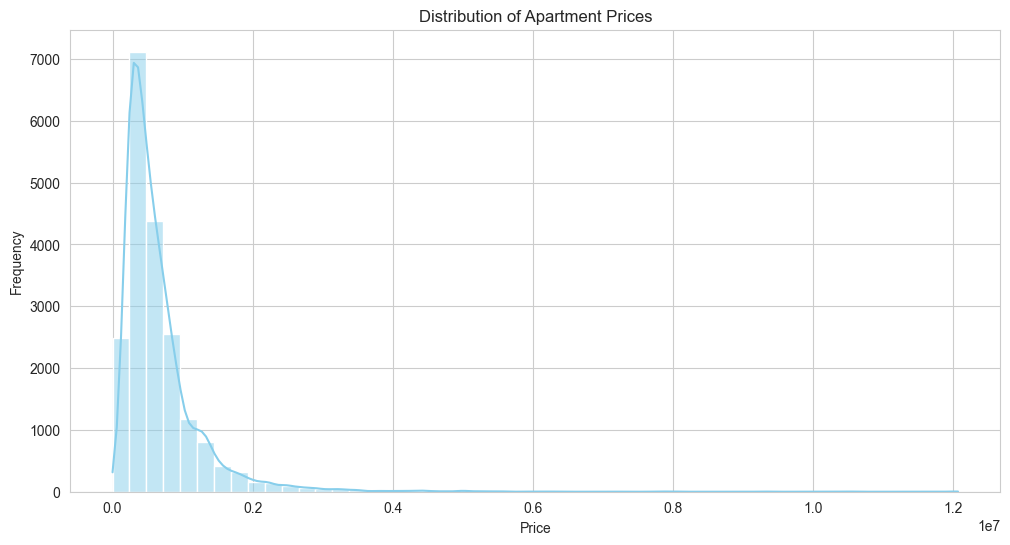

In [36]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Plot the distribution of the 'PRICE' column
plt.figure(figsize=(12, 6))
sns.histplot(df['PRICE'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Os valores dos apartamentos estão skewed para direita, conforme esperado.

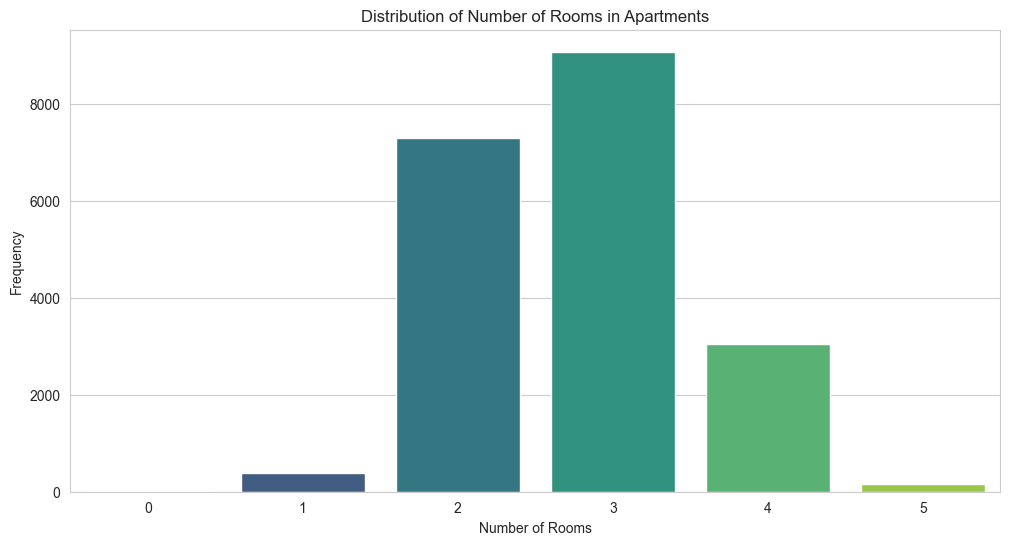

In [37]:
# Plot the distribution of the 'ROOMS_NO' column
plt.figure(figsize=(12, 6))
sns.countplot(x='ROOMS_NO', data=df, palette='viridis')
plt.title('Distribution of Number of Rooms in Apartments')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()

A maioria dos apartamentos possuem 2 ou 3 quartos

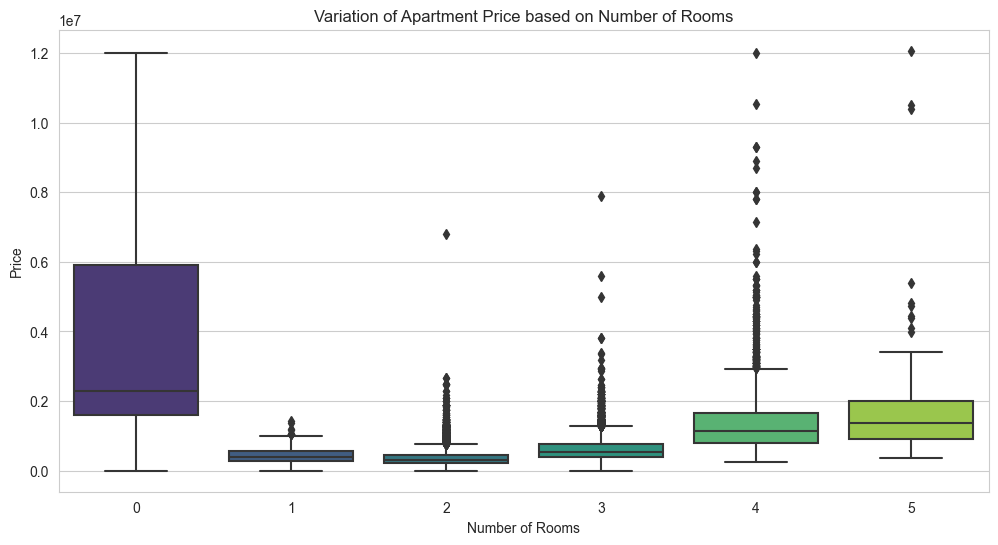

In [38]:
# Boxplot of 'PRICE' vs 'ROOMS_NO'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['ROOMS_NO'], y=df['PRICE'], palette='viridis')
plt.title('Variation of Apartment Price based on Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

Conforme esperado, o valor dos apartamentos sobe conforme o numero de quartos. Porém é interessante observar que os apartamentos de 1 quarto possuem maior mediana. Muito provavelmente pelo conceito da "gourmetização" da kitnet, que virou o moderno "loft" ou "studio". Vamos explorar os anuncios com 0 quartos. A suspeita é de que sejam lotes anunciados erroneamente como apartamentos.

In [40]:
# Filtrar onde ROOMS_NO é 0
filtered_df = df[df['ROOMS_NO'] == 0]

len(filtered_df)

7

In [41]:
filtered_df.head(7)

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Quarto de serviço,DETAIL_Varanda,DETAIL_Área de serviço
2377,Predio Comercial para à venda no bairro Itatia...,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,31360270,Itatiaia,0,2,360,0,2,0,NaN,1300000.0,pampulha,0,0,0,0,0,0,0,0,0,0
5696,Predio Comercial para à venda no bairro São Jo...,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31515300,São João Batista (Venda Nova),0,49,3178,0,5,0,NaN,6900000.0,venda_nova,0,0,0,0,0,0,0,0,0,0
9937,Maquininha de cartão,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30180101,Lourdes,1,1,0,0,0,0,NaN,147.0,zona_centro_sul,0,0,0,0,0,0,0,0,0,0
11129,"Andar Corporativo à venda, 7 vagas, Santo Agos...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30110017,Santa Efigênia,604,800,584,0,3,5,"Ar condicionado,Mobiliado",4900000.0,zona_leste,0,1,0,0,0,1,0,0,0,0
11130,"Andar Corporativo à venda, 9 vagas, Santa Efig...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30130090,Santa Efigênia,550,408,340,0,5,5,Ar condicionado,1899900.0,zona_leste,0,1,0,0,0,0,0,0,0,0
11995,Venda Commercial / Edificio Residencial Belo H...,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31015150,Floresta,0,6,690,0,5,2,NaN,2290000.0,zona_leste,0,0,0,0,0,0,0,0,0,0
12092,Predio Comercial para à venda no bairro Flores...,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30150150,Floresta,0,16,5814,0,4,0,NaN,12000000.0,zona_leste,0,0,0,0,0,0,0,0,0,0


Como podemos observar, os dados com 0 anuncios no quarto na verdade são de prédios, andares inteiros e maquininhas de cartão, que não faz sentido. Vamos dropar estes dados.

In [43]:
# Identificar as linhas onde ROOMS_NO é 0
rows_to_drop = df[df['ROOMS_NO'] == 0].index

# Dropar essas linhas
df = df.drop(rows_to_drop)

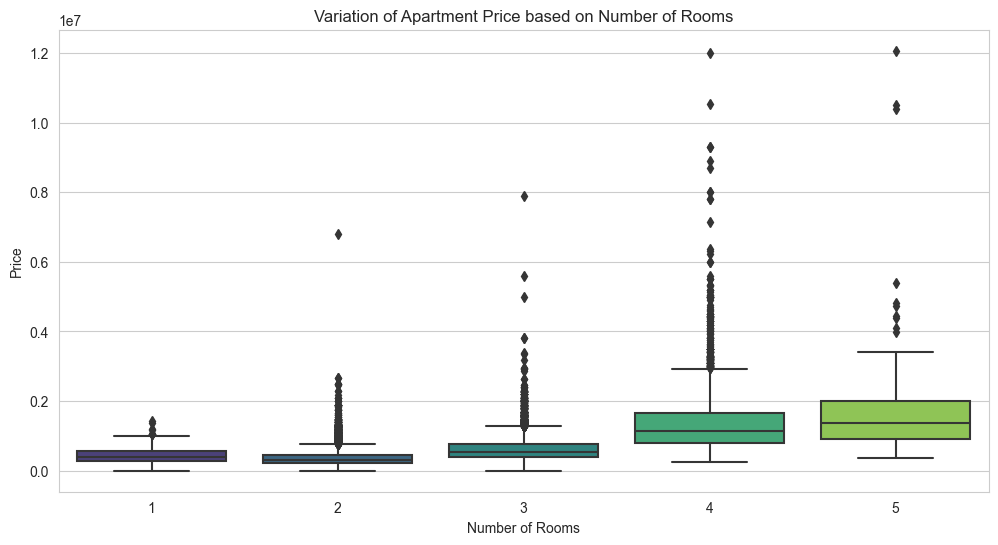

In [44]:
# Boxplot of 'PRICE' vs 'ROOMS_NO'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['ROOMS_NO'], y=df['PRICE'], palette='viridis')
plt.title('Variation of Apartment Price based on Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

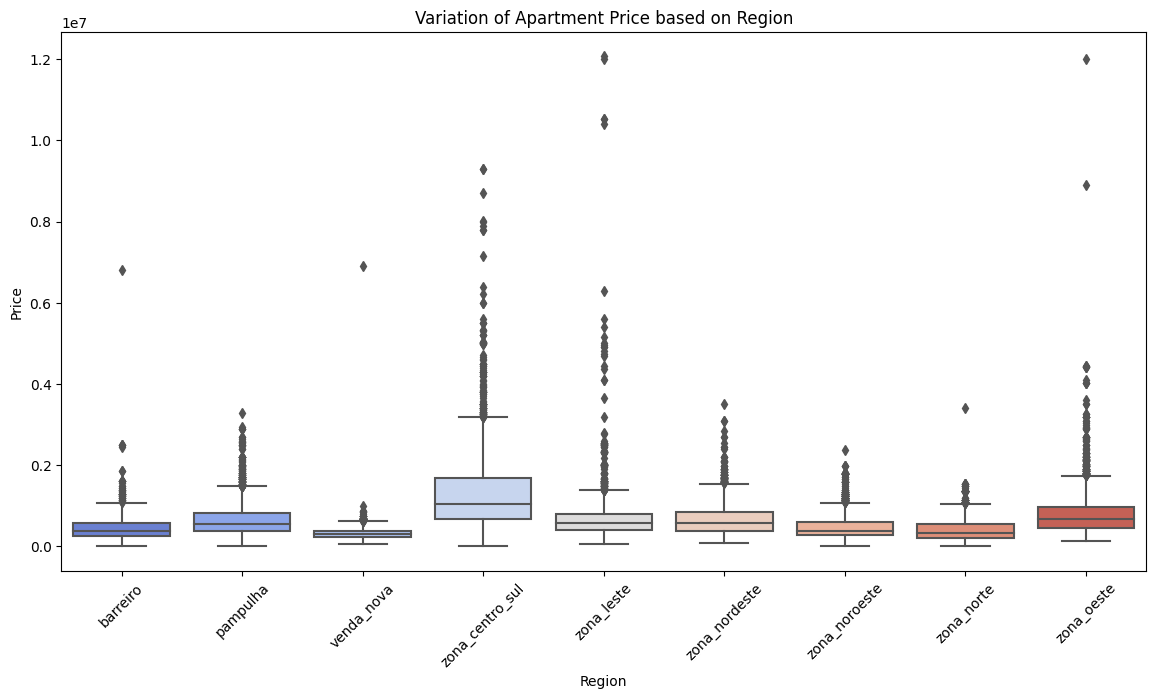

In [35]:
# Boxplot of 'PRICE' vs 'REGION'
plt.figure(figsize=(14, 7))
sns.boxplot(x=df['REGION'], y=df['PRICE'], palette='coolwarm')
plt.title('Variation of Apartment Price based on Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


Vemos que apesar do apartamento mais caro estar localizado na zona leste, a maior mediana encontra-se na zona sul.

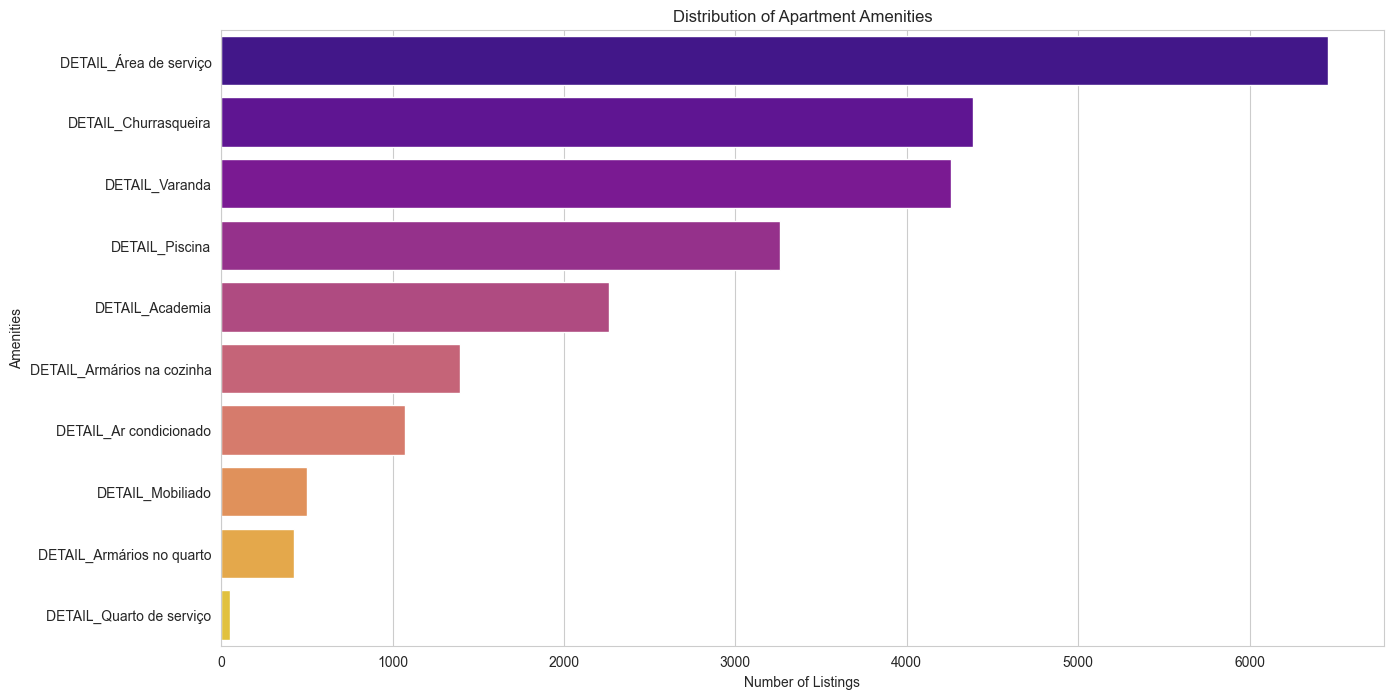

In [45]:
# Extract columns that start with 'DETAIL_'
detail_columns = [col for col in df.columns if col.startswith('DETAIL_')]

# Calculate the sum for each 'DETAIL_*' column to see the frequency of each amenity
amenities_count = df[detail_columns].sum().sort_values(ascending=False)

# Plot the distribution of amenities
plt.figure(figsize=(15, 8))
sns.barplot(y=amenities_count.index, x=amenities_count.values, palette='plasma')
plt.title('Distribution of Apartment Amenities')
plt.xlabel('Number of Listings')
plt.ylabel('Amenities')
plt.show()


A maioria dos apartamentos que possuem "detalhes", possuem varanda. Interessante observar que alguns apartamentos possuem "quartos de serviço"

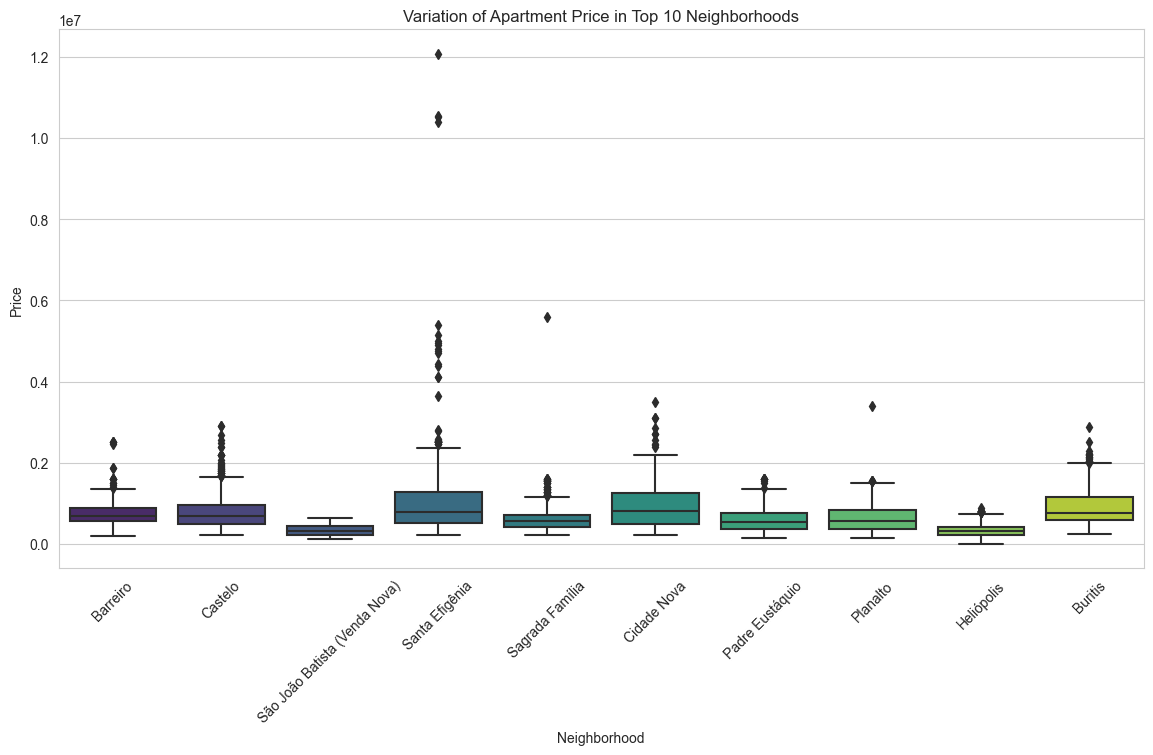

In [47]:
# Select top 10 neighborhoods with the most listings
top_neighborhoods = df['NEIGHBORHOOD'].value_counts().head(10).index

# Filter the dataframe to only include these top neighborhoods
df_top_neighborhoods = df[df['NEIGHBORHOOD'].isin(top_neighborhoods)]

# Boxplot of 'PRICE' vs 'NEIGHBORHOOD'
plt.figure(figsize=(14, 7))
sns.boxplot(x=df_top_neighborhoods['NEIGHBORHOOD'], y=df_top_neighborhoods['PRICE'], palette='viridis')
plt.title('Variation of Apartment Price in Top 10 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

O bairro Santa Efigênia possui alta variação dos dados. Isso se dá porque o bairro se encontra dividido entre duas regiões: a zona leste e a Savassi. Um é uma região de classe média, e o outro é uma das regiões mais nobres da cidade. Muito dos anuncios que o CEP está localizado em Santa Efigênia possui no corpo do anuncio que está localizado na savassi.

In [56]:
# Baixar a lista de stopwords em português
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


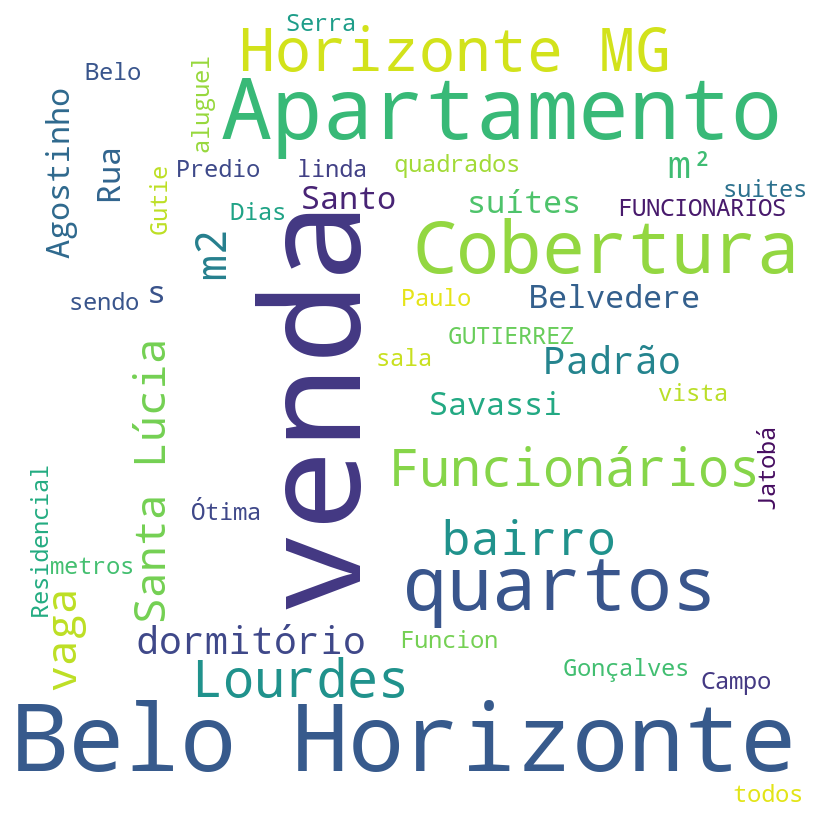

In [57]:
# Filtrar os 15 maiores valores
top_15 = df.nlargest(30, 'PRICE')


# Pegar todos os títulos
titles_list = top_15['TITLE'].tolist()

# Remover stopwords
filtered_titles = []
for title in titles_list:
    words = title.split()
    filtered_title = ' '.join([word for word in words if word.lower() not in stop_words])
    filtered_titles.append(filtered_title)

titles_string = ' '.join(filtered_titles)

# Criar a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(titles_string)

# Plotar a wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Conforme previsto, as palavras Funcionários e Savassi estão entre as mais utilizadas nos top30 anuncios por valor do bairro Santa Efigênia

### Análise Bivariada

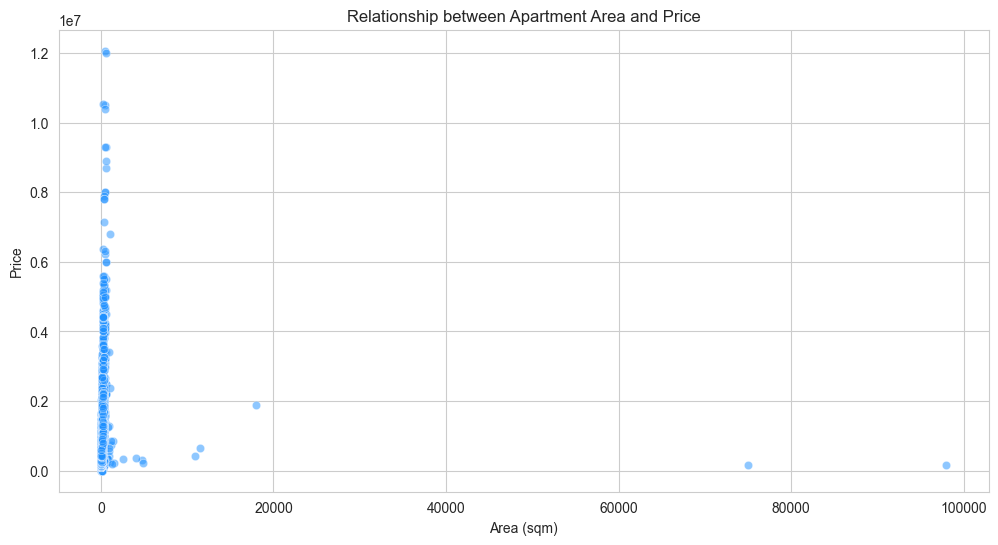

In [59]:
# Scatter plot of 'PRICE' vs 'AREA'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['AREA'], y=df['PRICE'], alpha=0.5, color='dodgerblue')
plt.title('Relationship between Apartment Area and Price')
plt.xlabel('Area (sqm)')
plt.ylabel('Price')
plt.show()

Vamos dropar todos os valores maior que 500m² de área, pois claramente estão errados

In [84]:
# Listar os 20 maiores valores da coluna "area"
filtered_df = df[df['AREA'] > 500].index

In [85]:
df.drop(filtered_df, inplace=True)

## Análise bi-variada

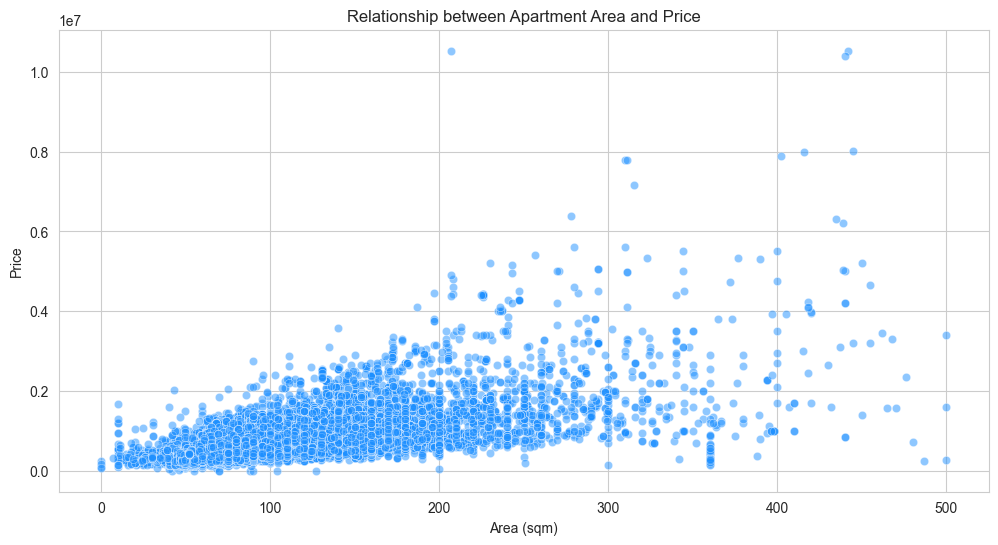

In [87]:
# Scatter plot of 'PRICE' vs 'AREA'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['AREA'], y=df['PRICE'], alpha=0.5, color='dodgerblue')
plt.title('Relationship between Apartment Area and Price')
plt.xlabel('Area (sqm)')
plt.ylabel('Price')
plt.show()

Conforme esperado, se nota uma correlação entre area e preço. Vamos avaliar a correlação:

In [89]:
correlation = df['AREA'].corr(df['PRICE'])

print(f"A correlação entre AREA e PRICE é: {correlation:.2f}")

A correlação entre AREA e PRICE é: 0.67


Existe uma correlação positiva, mas não uma correlação forte

Vamos avaliar os top10 bairros por preço, e os top10 menores:

In [94]:
# Calculate median prices for each neighborhood
median_prices_neighborhood = df.groupby('NEIGHBORHOOD')['PRICE'].median().sort_values(ascending=False)

# Get the top 10 neighborhoods with the highest median prices
top_10_median_neighborhoods = median_prices_neighborhood.head(10)

top_10_median_neighborhoods


NEIGHBORHOOD
Belvedere          2530000.0
São Bento          2100000.0
Mangabeiras        2035000.0
Santa Lúcia        1980000.0
Comiteco           1915000.0
São Jorge          1800000.0
Fazendinha         1730000.0
Savassi            1415000.0
Santo Agostinho    1390000.0
Funcionários       1310000.0
Name: PRICE, dtype: float64

Como sou habitante de Belo Horizonte, vejo que o bairro "Fazendinha" está listado com os maiores preços. Parece estranho, já que é um bairro humilde. Vamos investigar:

In [95]:
# Filtrar linhas onde NEIGHBORHOOD é "Fazendinha"
fazendinha_rows = df[df['NEIGHBORHOOD'] == 'Fazendinha']

fazendinha_rows.head()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Quarto de serviço,DETAIL_Varanda,DETAIL_Área de serviço
9857,Belo Horizonte - Apartamento Padrão - Itapoã,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30250440,Fazendinha,1,2,320,4,4,5,"Ar condicionado,Armários na cozinha,Churrasque...",1730000.0,zona_centro_sul,0,1,1,0,1,1,1,0,0,0


Claramente é um anuncio que não faz sentido. Foi anunciado com o CEP errado. Vamos eliminá-lo do nosso dataframe.

In [97]:
df = df[df['NEIGHBORHOOD'] != 'Fazendinha']

In [98]:
# Calculate median prices for each neighborhood
median_prices_neighborhood = df.groupby('NEIGHBORHOOD')['PRICE'].median().sort_values(ascending=False)

# Get the top 10 neighborhoods with the highest median prices
top_10_median_neighborhoods = median_prices_neighborhood.head(10)

top_10_median_neighborhoods


NEIGHBORHOOD
Belvedere          2530000.0
São Bento          2100000.0
Mangabeiras        2035000.0
Santa Lúcia        1980000.0
Comiteco           1915000.0
São Jorge          1800000.0
Savassi            1415000.0
Santo Agostinho    1390000.0
Funcionários       1310000.0
Anchieta           1290000.0
Name: PRICE, dtype: float64

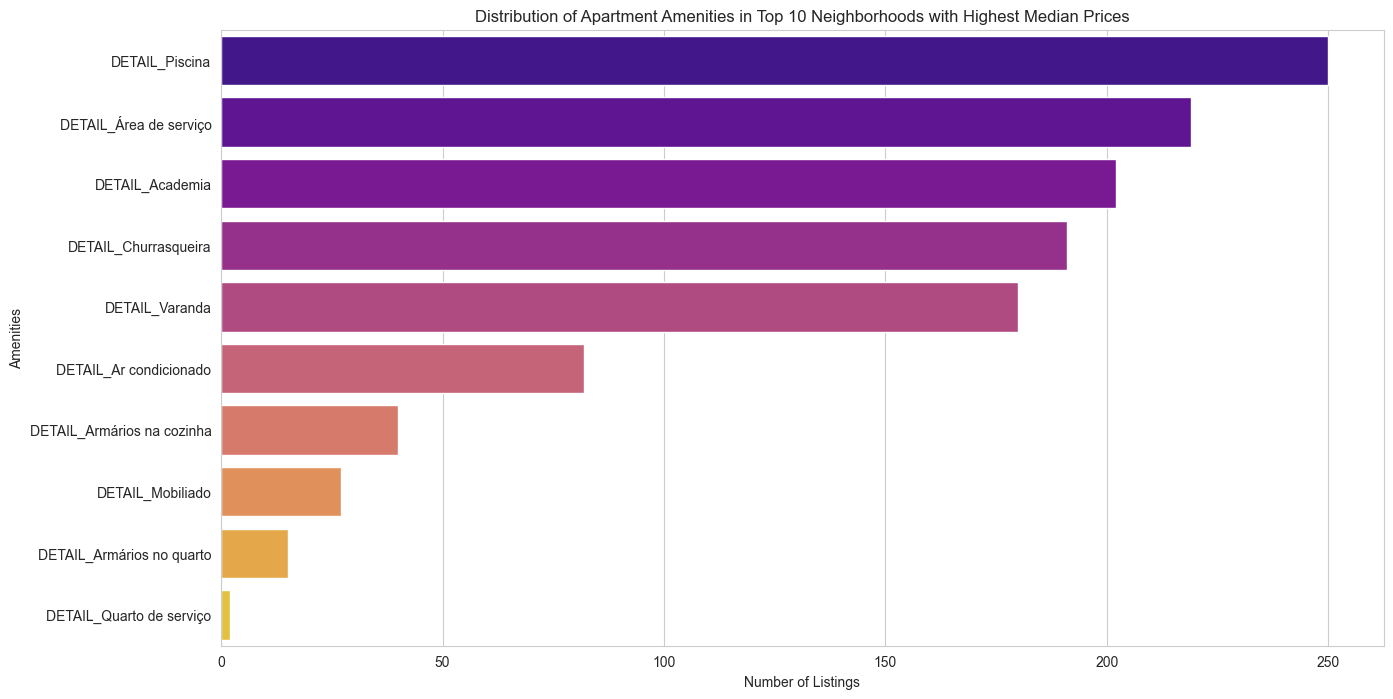

In [102]:
# Calculate the sum for each 'DETAIL_*' column to see the frequency of each amenity in these neighborhoods
amenities_count_top_neigh = df_top_median[detail_columns].sum().sort_values(ascending=False)

# Plot the distribution of amenities
plt.figure(figsize=(15, 8))
sns.barplot(y=amenities_count_top_neigh.index, x=amenities_count_top_neigh.values, palette='plasma')
plt.title('Distribution of Apartment Amenities in Top 10 Neighborhoods with Highest Median Prices')
plt.xlabel('Number of Listings')
plt.ylabel('Amenities')
plt.show()


Percebe-se que nos bairros com apartamentos caros, a grande maioria possui piscina. Um comportamento diferente do resto do dataframe, assim como ar condicionado

Vamos avaliar agora os bairros com menores preços

In [109]:
median_prices_neighborhood = df.groupby('NEIGHBORHOOD')['PRICE'].median().sort_values(ascending=False)
bottom_10_median_neighborhoods = median_prices_neighborhood.tail(10)
bottom_10_median_neighborhoods

NEIGHBORHOOD
Solar do Barreiro (Barreiro)    143000.0
Jardim Alvorada                 142000.0
Belmonte                        140000.0
Solimões                        130000.0
Castanheira (Barreiro)          120000.0
Granja de Freitas               110000.0
Águas Claras (Barreiro)         100000.0
Trevo (Dandara)                  85000.0
Jardim São José                  80000.0
Suzana                           60000.0
Name: PRICE, dtype: float64

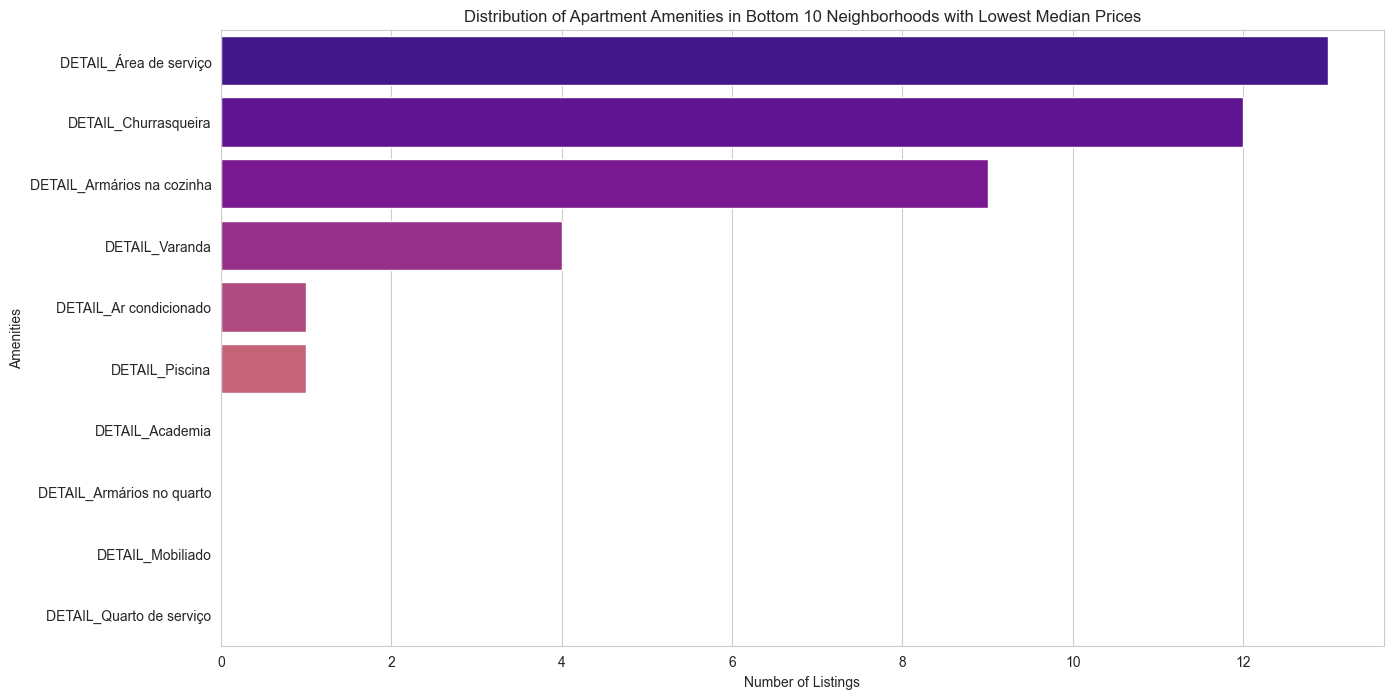

In [111]:
# Calculate the sum for each 'DETAIL_*' column to see the frequency of each amenity in these neighborhoods
amenities_count_bottom_neigh = df_bottom_median[detail_columns].sum().sort_values(ascending=False)

# Plot the distribution of amenities
plt.figure(figsize=(15, 8))
sns.barplot(y=amenities_count_bottom_neigh.index, x=amenities_count_bottom_neigh.values, palette='plasma')
plt.title('Distribution of Apartment Amenities in Bottom 10 Neighborhoods with Lowest Median Prices')
plt.xlabel('Number of Listings')
plt.ylabel('Amenities')
plt.show()


Percebe-se que os bairros mais humildes, conforme esperado, possuem muito menos detalhes que nos bairros mais abastados.

### Análise do detalhe: Piscina

Vamos avaliar como a distribuição de piscina se comporta no dataframe.

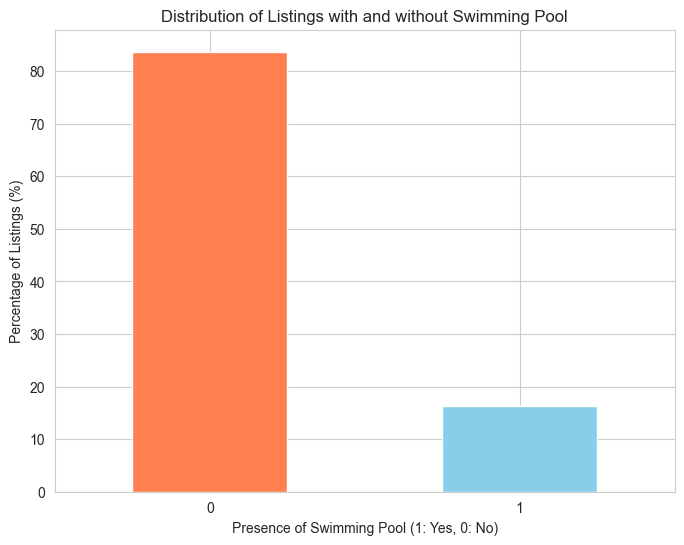

In [113]:
# Overall distribution of listings with and without a swimming pool
pool_distribution = df['DETAIL_Piscina'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(8, 6))
pool_distribution.plot(kind='bar', color=['coral', 'skyblue'])
plt.title('Distribution of Listings with and without Swimming Pool')
plt.xlabel('Presence of Swimming Pool (1: Yes, 0: No)')
plt.ylabel('Percentage of Listings (%)')
plt.xticks(rotation=0)
plt.show()



Apenas 16% dos belohorizontinos possuem acesso à piscina em casa :(

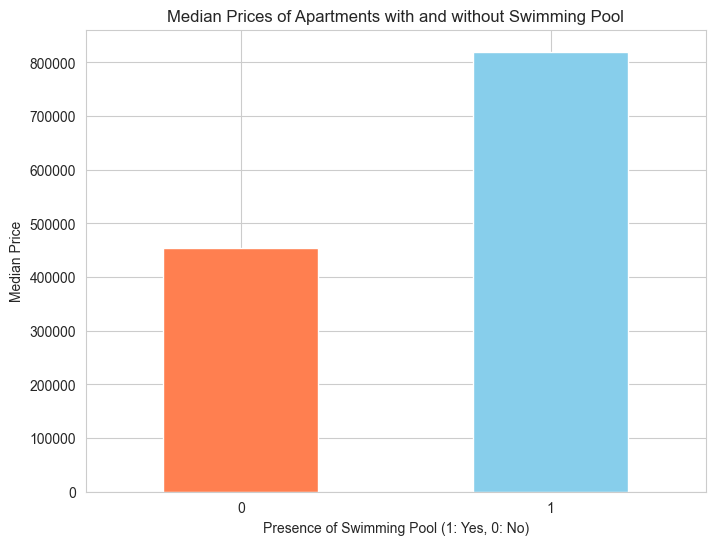

DETAIL_Piscina
0    455000.0
1    820000.0
Name: PRICE, dtype: float64

In [115]:
# Calculate median prices based on the presence of a swimming pool
median_prices_pool = df.groupby('DETAIL_Piscina')['PRICE'].median()

# Plot the median prices
plt.figure(figsize=(8, 6))
median_prices_pool.plot(kind='bar', color=['coral', 'skyblue'])
plt.title('Median Prices of Apartments with and without Swimming Pool')
plt.xlabel('Presence of Swimming Pool (1: Yes, 0: No)')
plt.ylabel('Median Price')
plt.xticks(rotation=0)
plt.show()

median_prices_pool


A presença de piscina aumenta em 55% a mediana dos imoveis

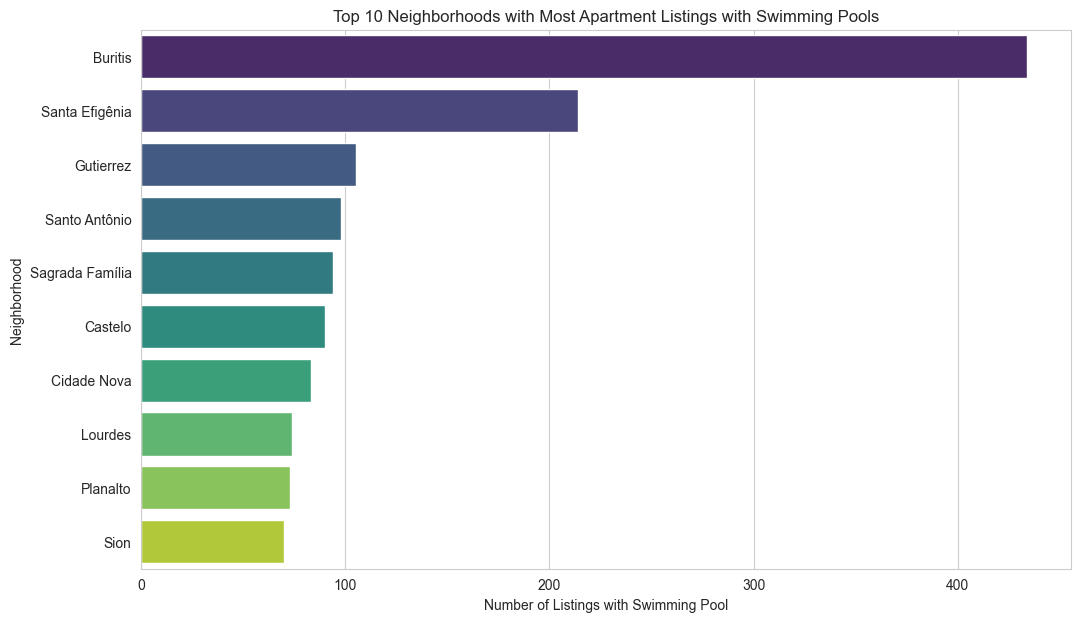

In [116]:
# Count the number of listings with swimming pools for each neighborhood
pool_neighborhood_count = df[df['DETAIL_Piscina'] == 1]['NEIGHBORHOOD'].value_counts().head(10)

# Plot the top 10 neighborhoods with the most listings with swimming pools
plt.figure(figsize=(12, 7))
sns.barplot(y=pool_neighborhood_count.index, x=pool_neighborhood_count.values, palette='viridis')
plt.title('Top 10 Neighborhoods with Most Apartment Listings with Swimming Pools')
plt.xlabel('Number of Listings with Swimming Pool')
plt.ylabel('Neighborhood')
plt.show()


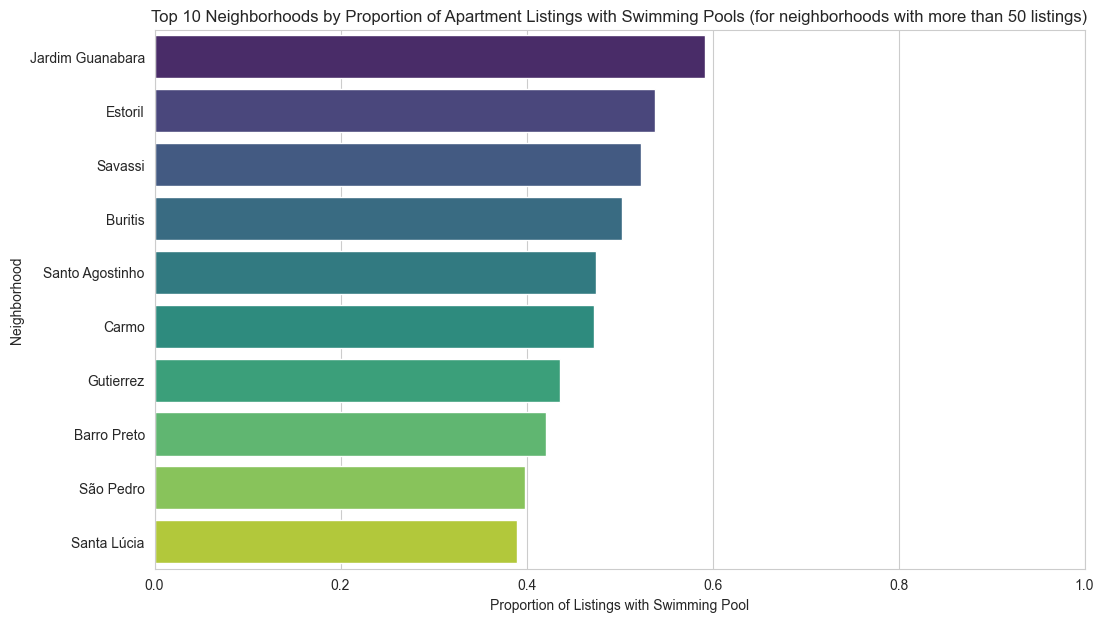

In [122]:
# Número total de imóveis por bairro
total_neighborhood_count = df['NEIGHBORHOOD'].value_counts()

# Filtrar bairros com mais de 50 anúncios
bairros_com_mais_de_50 = total_neighborhood_count[total_neighborhood_count > 50].index

# Número de imóveis com piscina por bairro, mas apenas para bairros com mais de 50 anúncios
pool_neighborhood_count = df[(df['DETAIL_Piscina'] == 1) & (df['NEIGHBORHOOD'].isin(bairros_com_mais_de_50))]['NEIGHBORHOOD'].value_counts()

# Calcula a proporção de imóveis com piscina por total de imóveis, mas apenas para bairros com mais de 50 anúncios
proportion_pool = (pool_neighborhood_count / total_neighborhood_count.loc[bairros_com_mais_de_50]).dropna()

# Ordene os bairros com base na proporção e pegue os 10 principais
top_proportion_pool = proportion_pool.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(y=top_proportion_pool.index, x=top_proportion_pool.values, palette='viridis')
plt.title('Top 10 Neighborhoods by Proportion of Apartment Listings with Swimming Pools (for neighborhoods with more than 50 listings)')
plt.xlabel('Proportion of Listings with Swimming Pool')
plt.ylabel('Neighborhood')
plt.xlim(0, 1) 
plt.show()

Finalizado o EDA, vamos salvar o df para utilizarmos no treinamento do nosso modelo de machine learning:

In [126]:
df.to_csv("df_dataframe_toML.csv")
df.head()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Quarto de serviço,DETAIL_Varanda,DETAIL_Área de serviço
0,Apartamento 03 quartos,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30662050,Tirol (Barreiro),350,120,67,3,2,1,"Área de serviço,Armários na cozinha,Armários n...",260000.0,barreiro,0,0,1,1,0,0,0,0,0,1
1,Apto,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620250,Milionários (Barreiro),250,0,66,3,1,1,"Área de serviço,Armários na cozinha,Armários n...",239990.0,barreiro,0,0,1,1,0,0,0,0,0,1
2,"Apartamento à venda - Barreiro, 2 quartos - Be...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30640150,Barreiro,300,2,56,2,1,1,Área de serviço,310000.0,barreiro,0,0,0,0,0,0,0,0,0,1
3,"Apartamento à Venda - Palmares, 3 Quartos, 85 m2",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31155292,Santa Cruz,900,270,85,3,2,2,"Churrasqueira,Piscina",620000.0,barreiro,0,0,0,0,1,0,1,0,0,0
4,"Apartamento 02 quartos, 01 vaga à venda no Bai...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620070,Milionários (Barreiro),290,400,47,2,1,1,"Área de serviço,Mobiliado",209900.0,barreiro,0,0,0,0,0,1,0,0,0,1
